In [2]:
import librosa
import librosa.display

from scipy.signal import butter, lfilter
import numpy as np
import sklearn
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from pathlib import Path
import csv
import json

In [41]:
DATA_SR = 128 # in Hz
AUDIO_LEN = 5  # in seconds
num_samples = AUDIO_LEN * DATA_SR


dataset_dir = Path("./datasets/ECG-kaggle-cleaned/")

In [ ]:
data = []

In [40]:
for subdataset_dir in dataset_dir.iterdir():
    if subdataset_dir.is_dir():
        print("Processing", subdataset_dir)
        with open(subdataset_dir / "RECORDS", "r") as f:
            for line in f:
                file_num = line.strip()
                data_point = np.load(subdataset_dir / (file_num + "_BEAT.npy"))
                print(data_point.shape)
                
                
                break

Processing datasets\ECG-kaggle-cleaned\incartdb_npy
Loading datasets\ECG-kaggle-cleaned\incartdb_npy\I01_BEAT.npy
(2757, 2)
Processing datasets\ECG-kaggle-cleaned\mitdb_npy
Loading datasets\ECG-kaggle-cleaned\mitdb_npy\100_BEAT.npy
(2273, 2)
Processing datasets\ECG-kaggle-cleaned\svdb_npy
Loading datasets\ECG-kaggle-cleaned\svdb_npy\800_BEAT.npy
(1883, 2)


In [94]:
test = np.load("./datasets/ECG-kaggle-cleaned/mitdb_npy/105_BEAT.npy", allow_pickle=True)
nums = np.array(test[:, 0], dtype=np.float)
labels = test[:, 1].astype(str)

nums
labels

array([1.25000e+02, 2.57000e+02, 3.86000e+02, ..., 2.30813e+05,
       2.30876e+05, 2.31037e+05])

array(['N', 'N', 'N', ..., 'V', 'V', 'N'], dtype='<U6')

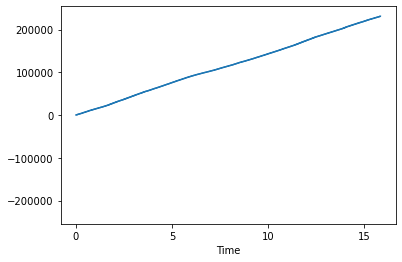

In [95]:
librosa.display.waveshow(nums, sr=DATA_SR)

# Not cleaned dataset

In [3]:
DATA_SR = 125 # in Hz

In [4]:
df_train = pd.read_csv("./datasets/ECG-kaggle/mitbih_train.csv", header=None)
df_train = df_train.sample(frac=1)
df_test = pd.read_csv("./datasets/ECG-kaggle/mitbih_test.csv", header=None)
df_test = df_test.sample(frac=1)

In [6]:
X_train = np.array(df_train[list(range(187))].values)
X_train = np.expand_dims(X_train, -1)
y_train = np.array(df_train[187].values).astype(np.int8)
y_train[y_train != 0] = 1 # coverting to be just normal (0) and abnormal (1)

In [7]:
X_test = np.array(df_test[list(range(187))].values)
X_test = np.expand_dims(X_test, -1)
y_test = np.array(df_test[187].values).astype(np.int8)
y_test[y_test != 0] = 1

In [8]:
set(y_train)

X_train.shape
y_train.shape
X_test.shape
y_test.shape

{0, 1}

(87554, 187, 1)

(87554,)

(21892, 187, 1)

(21892,)